C:\Users\Rubens\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



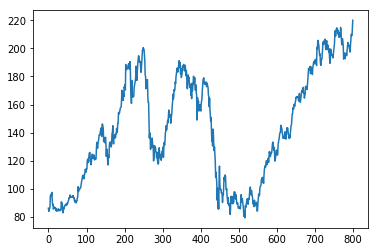

In [1]:
#%reset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
np.random.seed(42)
dataframe = pd.read_csv('Apple_Data_300.csv').iloc[0:800,:]
dataframe.head()

plt.plot(range(0,dataframe.shape[0]),dataframe.iloc[:,1])
plt.show()

In [2]:
x1=np.array(dataframe.iloc[:,1]+np.random.randn(dataframe.shape[0])).astype(np.float32).reshape(-1,1)

y=np.array(dataframe.iloc[:,1]).T.astype(np.float32).reshape(-1,1)

tfd = tfp.distributions

init = tf.global_variables_initializer()

In [3]:
with tf.Session() as sess:

    model = tf.keras.Sequential([
      tf.keras.layers.Dense(1,kernel_initializer='glorot_uniform'),
      tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1))
    ])
    negloglik = lambda x, rv_x: -rv_x.log_prob(x)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=negloglik)
    
    model.fit(x1,y, epochs=500, verbose=True, batch_size=16)
    
    yhat = model(x1)
    mean = yhat.mean()


    sess.run(init)
    mm = sess.run(mean)    
    mean = yhat.mean()
    stddev = yhat.stddev()
    mean_plus_2_std = sess.run(mean - 2. * stddev)
    mean_minus_2_std = sess.run(mean + 2. * stddev)


Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/500
800/800 [==============================] - 0s 186us/sample - loss: 2491.5583
Epoch 2/500
800/800 [==============================] - 0s 50us/sample - loss: 2009.5407
Epoch 3/500
800/800 [==============================] - 0s 50us/sample - loss: 1603.6938
Epoch 4/500
800/800 [==============================] - 0s 49us/sample - loss: 1264.3714
Epoch 5/500
800/800 [==============================] - 0s 46us/sample - loss: 983.4013
Epoch 6/500
800/800 [==============================] - 0s 49us/sample - loss: 754.6120
Epoch 7/500
800/800 [==============================] - 0s 47us/sample - loss: 570.5041
Epoch 8/500
800/800 [==============================] - ETA: 0s - loss: 410.847 - 0s 49us/sample - loss: 424.1867
Epoch 9/500
800/800 [==============================] - 0s 49us/sample - loss: 311.1432
Epoch 10/500
800/800 [==============================] - 0s 49us/sample - loss: 223.6103
Epoch 11/500
800/800 [====

800/800 [==============================] - 0s 51us/sample - loss: 1.4009
Epoch 93/500
800/800 [==============================] - 0s 47us/sample - loss: 1.4003
Epoch 94/500
800/800 [==============================] - 0s 54us/sample - loss: 1.4000
Epoch 95/500
800/800 [==============================] - 0s 50us/sample - loss: 1.4000
Epoch 96/500
800/800 [==============================] - 0s 45us/sample - loss: 1.4000
Epoch 97/500
800/800 [==============================] - 0s 47us/sample - loss: 1.4002
Epoch 98/500
800/800 [==============================] - 0s 45us/sample - loss: 1.4002
Epoch 99/500
800/800 [==============================] - 0s 44us/sample - loss: 1.4001
Epoch 100/500
800/800 [==============================] - 0s 50us/sample - loss: 1.4002
Epoch 101/500
800/800 [==============================] - 0s 45us/sample - loss: 1.4005
Epoch 102/500
800/800 [==============================] - 0s 52us/sample - loss: 1.4000
Epoch 103/500
800/800 [==============================] - 0s 47us

800/800 [==============================] - 0s 40us/sample - loss: 1.4045
Epoch 187/500
800/800 [==============================] - 0s 44us/sample - loss: 1.4042
Epoch 188/500
800/800 [==============================] - 0s 40us/sample - loss: 1.4005
Epoch 189/500
800/800 [==============================] - 0s 46us/sample - loss: 1.4017
Epoch 190/500
800/800 [==============================] - 0s 42us/sample - loss: 1.4163
Epoch 191/500
800/800 [==============================] - 0s 37us/sample - loss: 1.4045
Epoch 192/500
800/800 [==============================] - 0s 37us/sample - loss: 1.4020
Epoch 193/500
800/800 [==============================] - 0s 40us/sample - loss: 1.4091
Epoch 194/500
800/800 [==============================] - 0s 40us/sample - loss: 1.4047
Epoch 195/500
800/800 [==============================] - 0s 40us/sample - loss: 1.4049
Epoch 196/500
800/800 [==============================] - 0s 37us/sample - loss: 1.4067
Epoch 197/500
800/800 [==============================] - 

800/800 [==============================] - 0s 46us/sample - loss: 1.4075
Epoch 281/500
800/800 [==============================] - 0s 42us/sample - loss: 1.4042
Epoch 282/500
800/800 [==============================] - 0s 41us/sample - loss: 1.4065
Epoch 283/500
800/800 [==============================] - 0s 42us/sample - loss: 1.4077
Epoch 284/500
800/800 [==============================] - 0s 39us/sample - loss: 1.4021
Epoch 285/500
800/800 [==============================] - 0s 39us/sample - loss: 1.4044
Epoch 286/500
800/800 [==============================] - 0s 20us/sample - loss: 1.4027
Epoch 287/500
800/800 [==============================] - 0s 39us/sample - loss: 1.4062
Epoch 288/500
800/800 [==============================] - 0s 23us/sample - loss: 1.4039
Epoch 289/500
800/800 [==============================] - 0s 39us/sample - loss: 1.4045
Epoch 290/500
800/800 [==============================] - 0s 54us/sample - loss: 1.4085
Epoch 291/500
800/800 [==============================] - 

800/800 [==============================] - 0s 39us/sample - loss: 1.4105
Epoch 375/500
800/800 [==============================] - 0s 39us/sample - loss: 1.4092
Epoch 376/500
800/800 [==============================] - 0s 28us/sample - loss: 1.4122
Epoch 377/500
800/800 [==============================] - 0s 39us/sample - loss: 1.4090
Epoch 378/500
800/800 [==============================] - 0s 35us/sample - loss: 1.4133
Epoch 379/500
800/800 [==============================] - 0s 51us/sample - loss: 1.3994
Epoch 380/500
800/800 [==============================] - 0s 39us/sample - loss: 1.4076
Epoch 381/500
800/800 [==============================] - 0s 39us/sample - loss: 1.4145
Epoch 382/500
800/800 [==============================] - 0s 28us/sample - loss: 1.4148
Epoch 383/500
800/800 [==============================] - 0s 39us/sample - loss: 1.4080
Epoch 384/500
800/800 [==============================] - 0s 39us/sample - loss: 1.4105
Epoch 385/500
800/800 [==============================] - 

800/800 [==============================] - 0s 45us/sample - loss: 1.4046
Epoch 469/500
800/800 [==============================] - 0s 47us/sample - loss: 1.4076
Epoch 470/500
800/800 [==============================] - 0s 44us/sample - loss: 1.4030
Epoch 471/500
800/800 [==============================] - 0s 51us/sample - loss: 1.4041
Epoch 472/500
800/800 [==============================] - 0s 50us/sample - loss: 1.4149
Epoch 473/500
800/800 [==============================] - 0s 50us/sample - loss: 1.4094
Epoch 474/500
800/800 [==============================] - 0s 59us/sample - loss: 1.4065
Epoch 475/500
800/800 [==============================] - 0s 49us/sample - loss: 1.4146
Epoch 476/500
800/800 [==============================] - 0s 47us/sample - loss: 1.4060
Epoch 477/500
800/800 [==============================] - 0s 49us/sample - loss: 1.4025
Epoch 478/500
800/800 [==============================] - 0s 47us/sample - loss: 1.4016
Epoch 479/500
800/800 [==============================] - 

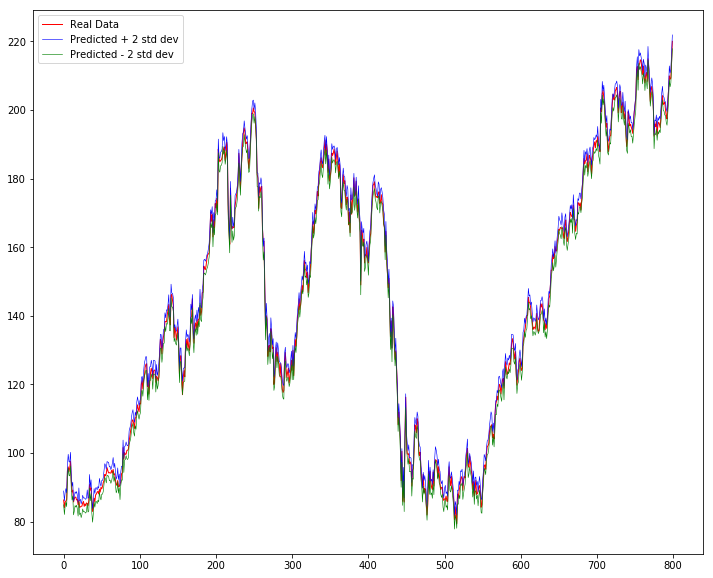

In [4]:
plt.figure(figsize=(12,10))
plt.plot(y,color='red',linewidth=1,label='Real Data')
#plt.plot(mm)
plt.plot(mean_minus_2_std,color='blue',linewidth=0.6,label='Predicted + 2 std dev')
plt.plot(mean_plus_2_std,color='green',linewidth=0.6,label='Predicted - 2 std dev')
plt.legend()
plt.show()